In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)
#Here V1 is target variable(ham/spam)
#Unnamed columns seems to be having more null values.will explore

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3267,ham,Which is why i never wanted to tell you any of...,NaN,NaN,NaN
1680,ham,Okay... We wait ah,NaN,NaN,NaN
2201,ham,A boy was late 2 home. His father: \POWER OF F...,NaN,NaN,NaN
975,ham,Hey no I ad a crap nite was borin without ya 2...,NaN,NaN,NaN
5509,ham,Lol they were mad at first but then they woke ...,NaN,NaN,NaN


In [4]:
#Shape of the dataset
df.shape

(5572, 5)

**Data cleaning**

In [5]:
#Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Checking null values proportion
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Unnamed: 4    0.998923
Unnamed: 3    0.997846
Unnamed: 2    0.991027
v1            0.000000
v2            0.000000
dtype: float64

As expected, Unnamed columns are of no use as they consist more than 99% null data

In [7]:
#Dropping the same
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
#New df....Great!!! But the column names seems to be invalid.So let's rename them
df.sample(5)

,v1,v2
5380,ham,Its sunny in california. The weather's just cool
836,spam,Do you want 750 anytime any network mins 150 t...
4529,ham,Don't forget though that I love you .... And I...
4789,ham,Yup. Izzit still raining heavily cos i'm in e ...
4359,ham,"Night sweet, sleep well! I've just been to see..."


In [9]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
#here we go!!!
df.sample(5)

,target,text
5371,ham,"Lol, oh you got a friend for the dog ?"
2756,ham,Have a good trip. Watch out for . Remember whe...
4341,ham,Ha! I wouldn't say that I just didn't read any...
3535,ham,Oic cos me n my sis got no lunch today my dad ...
3446,ham,Sitting ard nothing to do lor. U leh busy w work?


* Now let's go column by column
* firstly,
* target column-
    *     Will do encoding for machine understanding of spam/ham type
* for text column lot work is to be done..But yeahh!!! we will follow these steps
    *     Remove dulicates
    *     Perform EDA
*     Using NLTK, will perform some more analysis
*     Perform some NLP steps to find out top most words used in spam/ham messages
*     Build the model using feature extraction techniques and using different algos
*     Finally chose the best model based on precision and accuracy scores
*  So what are waiting..Let's continue!!


In [11]:
df.isnull().sum()
#No missing values

target    0
text      0
dtype: int64

In [12]:
#Check for duplicate values
df.duplicated().sum()

#!Ooops we got duplicate values so let' remove them

403

In [13]:
#Removing duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
#shape of the df
df.shape

(5169, 2)

#  EDA

In [16]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

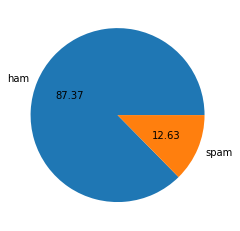

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## 87%ham and 13%spam messages present in the dataset

Before building model
I want to check the number of words,character and sentences present in the spam & ham messages
Is there any difference?
Let's check by using nltk library

p.s:
The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Number of characters
df['Number_of_characters']=df['text'].apply(len)
#Num of sentences
df['Number_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
#Num of words
df['Number_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.sample(6)
#here we go!!we got all we want

,target,text,Number_of_characters,Number_of_sentences,Number_of_words
5037,ham,Thanks for being there for me just to talk to ...,133,3,31
1580,ham,"I shall book chez jules for half eight, if tha...",62,1,16
5526,spam,PRIVATE! Your 2003 Account Statement for shows...,134,4,22
1969,spam,You have won a guaranteed å£200 award or even ...,133,1,27
438,ham,"Hi hope u get this txt~journey hasnt been gd,n...",76,1,18
2635,ham,Tiwary to rcb.battle between bang and kochi.,44,1,8


In [21]:
#Let's know more about the newly created columns
df[['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


Ok But is there any difference in spam and ham messages
Will do that, Once I complete label encoding of target column

In [22]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
#ham=0,spam=1

In [23]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [24]:
#ham messages summary
df[df['target']==0][['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [25]:
#Spam messages summary
df[df['target']==1][['Number_of_characters','Number_of_sentences','Number_of_words']].describe()

,Number_of_characters,Number_of_sentences,Number_of_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.967841,27.667688
std,30.137753,1.483201,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,8.000000,46.000000


## Spam messages found to lengthier than ham messages!!Ola!!

Now it's time to check the distribution

<AxesSubplot:xlabel='Number_of_words', ylabel='Count'>

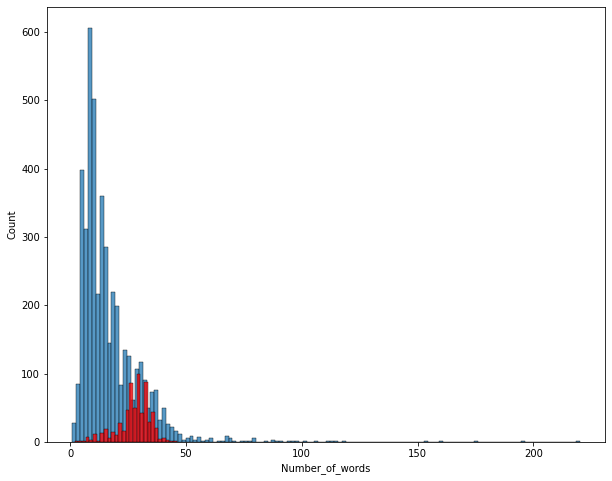

In [26]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(df[df['target']==0]['Number_of_words'])
sns.histplot(df[df['target']==1]['Number_of_words'],color='red')

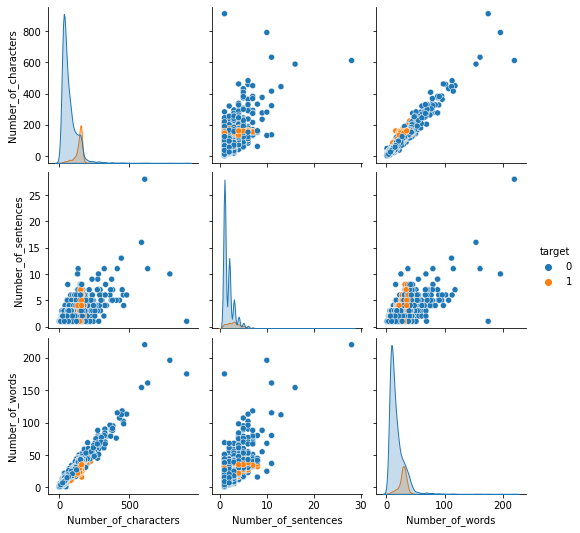

In [27]:
# Pair plot
sns.pairplot(df,hue='target')

all are having some correlation but let's check the same in value mode through heatmap

<AxesSubplot:>

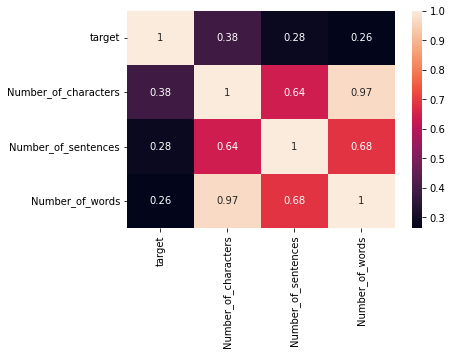

In [28]:
sns.heatmap(df.corr(),annot=True)

##### There is multi collinearity between Number of sentences,words,characters
##### What do you think which one we shall chose for further process

#####  I am choosing Number of characters column as it has more spread(0.38)

> # Data preprocessing

* Steps to be followed
    * Lower case
    * Tokenization
    * Removing special characters
    * Removing stopwords and punctuations
    * Stemming

NLP

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
def transform_text(text):
    text=text.lower()#converting to lower case
    text=nltk.word_tokenize(text)#breaking the sentence to words
    a=[]
    for i in text:#To remove special charcters
        if i.isalnum():#To keep alphanumerica and alphacharcters only
            a.append(i)
    text=a[:]#cloning to attach list 
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))#stemming-before loving after love
    return " ".join(a)#to join all the stemmed words

In [31]:
#To check stopwords in english language
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
#To check various strings
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
#check whether function is working
transform_text("I am going to hyderabad. Will you come with me")

'go hyderabad come'

In [34]:
#checking stemming
ps.stem("lovings")

'love'

In [35]:
print(df['text'][10])
#check the the function after nltk
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
#Let's create new column and add all these transformed data
df['transformed_text']=df['text'].apply(transform_text)

In [37]:
df.head()

,target,text,Number_of_characters,Number_of_sentences,Number_of_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


Most used words in spam messages


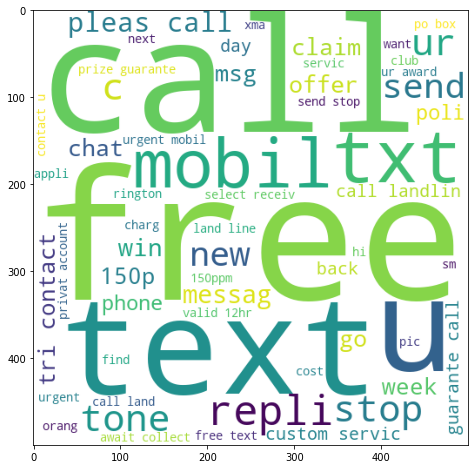

In [38]:
#Before building I want to check what are top most words used in the messages
#Using word cloud let's check the most using words in ham and spam messages
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)
print("Most used words in spam messages")

Most used words in ham messages


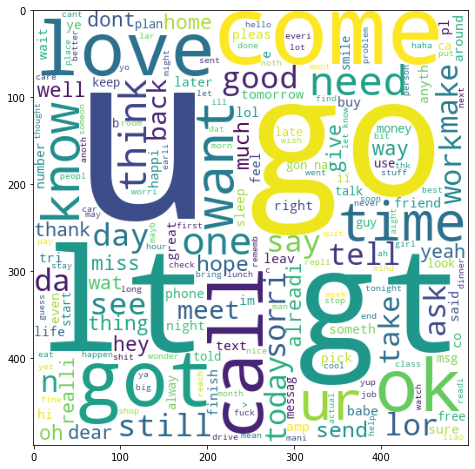

In [39]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)
print("Most used words in ham messages")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TOP 30 words used in spam messages


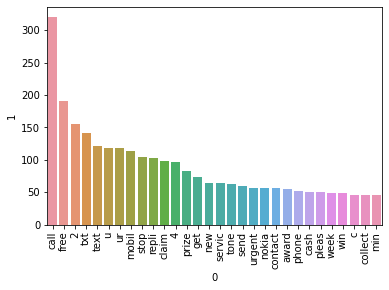

In [40]:
#Let's get the text data in a list format and then split into words
spam_words=[]
for message in df[df['target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_words.append(word)
from collections import Counter
words_count=pd.DataFrame(Counter(spam_words).most_common(30))
sns.barplot(words_count[0],words_count[1])
print("TOP 30 words used in spam messages")
plt.xticks(rotation='vertical')
plt.show()



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TOP 30 words used in ham messages


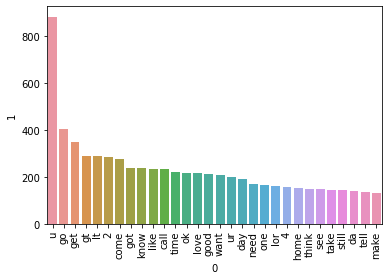

In [41]:
ham_words=[]
for message in df[df['target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_words.append(word)
from collections import Counter
words_count=pd.DataFrame(Counter(ham_words).most_common(30))
sns.barplot(words_count[0],words_count[1])
print("TOP 30 words used in ham messages")
plt.xticks(rotation='vertical')
plt.show()


# Model Building

In [42]:
df.head(2)

,target,text,Number_of_characters,Number_of_sentences,Number_of_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni


As machines cannot understand text words, we have to convert them into machine readable form. To do that, here we are going to use vectorization techinque

In [43]:
# Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, 
#word similarities/semantics.
#The process of converting words into numbers are called Vectorization.

In [44]:
#There are three methods of vectorization
# 1.Bag of words
# 2.TF-IDF
# 3.wordtovect
#But to save time, I am using tfidf as it works better with classification.
#you can check other methods if you want

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [46]:
#We can do scaling here but it's of no use.
# If you want you can try Minmax scaler.I have tried it already, 
# accuracy is coming high but on the cost of precision.hence same was opted out.

In [47]:
#importing necessary libraries
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [48]:
#Using TFIDF vectorization
X=tfidf.fit_transform(df['transformed_text']).toarray()#Converting sparse array to dense array
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('GaussianNB')
print('accuracy_score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('---------------')
print('MultinomialNB')
mnb.fit(X_train,y_train)
y_pred_2=mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print('precision_score',precision_score(y_test,y_pred_2))
print('---------------')
print('BernoulliNB')
bnb.fit(X_train,y_train)
y_pred_3=bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print('precision_score',precision_score(y_test,y_pred_3))

GaussianNB
accuracy_score 0.8607350096711799
[[769 120]
 [ 24 121]]
precision_score 0.5020746887966805
---------------
MultinomialNB
accuracy_score 0.9729206963249516
[[888   1]
 [ 27 118]]
precision_score 0.9915966386554622
---------------
BernoulliNB
accuracy_score 0.9729206963249516
[[884   5]
 [ 23 122]]
precision_score 0.9606299212598425


# As precision score is important in spam detection, MultinomialNB model working great having accuracy score of 97% and precision score of 99.1%

In [49]:
# Can any other algo gives better results than this???
#Let's check

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)#support vector machine results

(0.97678916827853, 0.9548872180451128)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9836065573770492
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8832116788321168
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.95
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9242424242424242


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [57]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.973888,0.983607
0,SVC,0.976789,0.954887
9,GBDT,0.946809,0.950000
10,xgb,0.968085,0.924242
7,BgC,0.961315,0.883212
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


# Multinomial NB model is working great having better accuracy and best Precision value..Hence we will opt for Multinomial NB among all models.

In [58]:
# Thank you very much!!!!Please comment for any suggestions.